In [3]:
from matplotlib.pyplot import *
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [4]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
type(pd_raw)

pandas.core.frame.DataFrame

In [5]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [6]:
time_idx=pd_raw.columns[4:]

In [7]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:

pd_raw['Country/Region']
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         1
1/28/20         4
1/29/20         4
1/30/20         4
1/31/20         5
2/1/20          8
2/2/20         10
2/3/20         12
2/4/20         12
2/5/20         12
2/6/20         12
2/7/20         13
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        16
2/12/20        16
2/13/20        16
2/14/20        16
2/15/20        16
2/16/20        16
2/17/20        16
2/18/20        16
2/19/20        16
2/20/20        16
2/21/20        16
2/22/20        16
2/23/20        16
2/24/20        16
2/25/20        17
2/26/20        27
2/27/20        46
2/28/20        48
2/29/20        79
3/1/20        130
3/2/20        159
3/3/20        196
3/4/20        262
3/5/20        482
3/6/20        670
3/7/20        799
3/8/20       1040
3/9/20       1176
3/10/20      1457
3/11/20      1908
3/12/20      2078
3/13/20      3675
3/14/20      4585
3/15/20      5795
3/16/20      7272
3/17/20   

In [7]:
countries= []
countries = pd_raw['Country/Region'].unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [9]:
country_list = []
for col in pd_raw.columns:
        val = list(pd_raw['Country/Region'])
        for v in val:
            country_list.append(v)
country_list = list(dict.fromkeys(country_list))
country_list = country_list[:100]
country_list


['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

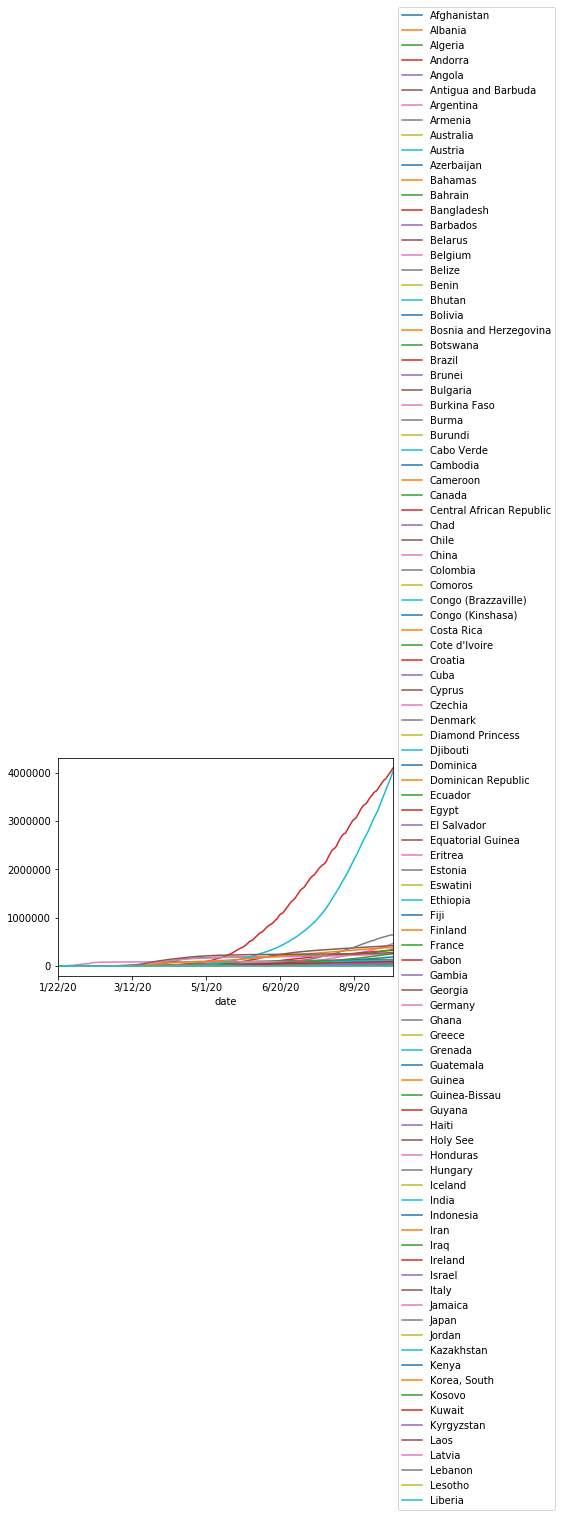

In [14]:
for each in country_list:
  df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

%matplotlib inline
df_plot.set_index("date").plot().legend(loc='center left',bbox_to_anchor=(1.0, 1.0));




In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] 
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] 

In [11]:
df_plot['date']=time_idx
type(df_plot['date'][0])
df_plot.head()


,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,3,0,0,0,0,0,0,0,0


In [12]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Relational Data Model

In [13]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [15]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no') 

In [16]:

pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()


,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304
1,no,Albania,0,0,0,0,0,0,0,0,...,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967
2,no,Algeria,0,0,0,0,0,0,0,0,...,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773
3,no,Andorra,0,0,0,0,0,0,0,0,...,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215
4,no,Angola,0,0,0,0,0,0,0,0,...,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876


In [17]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [1]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

NameError: name 'pd_relational_model' is not defined

In [19]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)